In [3]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from src.model_utils import model, forward_propagation
import numpy as np
import h5py


In [4]:
# ✔ Load dataset
train_dataset = h5py.File('../data/train_catvnoncat.h5', "r")
test_dataset = h5py.File('../data/test_catvnoncat.h5', "r")

train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y_orig = np.array(train_dataset["train_set_y"][:])
test_set_x_orig = np.array(test_dataset["test_set_x"][:])
test_set_y_orig = np.array(test_dataset["test_set_y"][:])

# ✔ Preprocess
train_x = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T / 255.
test_x = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T / 255.
train_y = train_set_y_orig.reshape(1, -1)
test_y = test_set_y_orig.reshape(1, -1)

print(f"train_x shape: {train_x.shape}")
print(f"train_y shape: {train_y.shape}")
print(f"test_x shape: {test_x.shape}")
print(f"test_y shape: {test_y.shape}")


train_x shape: (12288, 209)
train_y shape: (1, 209)
test_x shape: (12288, 50)
test_y shape: (1, 50)


In [5]:
# ✔ Model structure (2-layer network for current implementation)
layers_dims = [12288, 20, 1]

# ✔ Train
parameters = model(train_x, train_y, layers_dims, num_iterations=2500, print_cost=True)


Cost after iteration 0: 0.6940143280856471
Cost after iteration 100: 0.6450616590273905
Cost after iteration 200: 0.6354760688171598
Cost after iteration 300: 0.6130134284868799
Cost after iteration 400: 0.5733794001074776
Cost after iteration 500: 0.5226830439180004
Cost after iteration 600: 0.4659541514998414
Cost after iteration 700: 0.40706159303459827
Cost after iteration 800: 0.34941470735290914
Cost after iteration 900: 0.2951754227687829
Cost after iteration 1000: 0.3355065147713941
Cost after iteration 1100: 0.2895484062242164
Cost after iteration 1200: 0.2506209126691912
Cost after iteration 1300: 0.21568492023209307
Cost after iteration 1400: 0.1804977644460697
Cost after iteration 1500: 0.13798971275010913
Cost after iteration 1600: 0.10603845796030908
Cost after iteration 1700: 0.08956538476838348
Cost after iteration 1800: 0.07811137148468651
Cost after iteration 1900: 0.06869693514874078
Cost after iteration 2000: 0.06085909217717385
Cost after iteration 2100: 0.05428074

In [6]:
# Evaluate test accuracy
AL, _ = forward_propagation(test_x, parameters)
predictions = (AL > 0.5)
accuracy = np.mean(predictions == test_y)
print(f"Test accuracy: {accuracy * 100:.2f}%")


Test accuracy: 72.00%


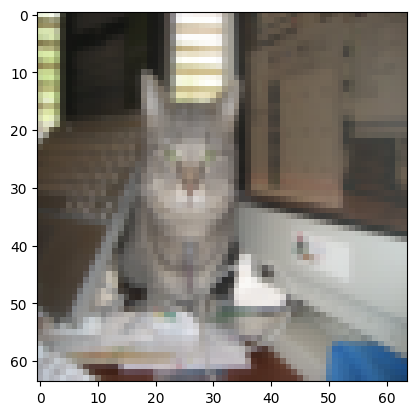

Prediction: cat


/var/folders/8x/cjrhr78j7yb1bsf0dr090bf80000gn/T/ipykernel_8757/3072313852.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction = int(AL > 0.5)


In [14]:
import matplotlib.pyplot as plt

index = 7  
plt.imshow(test_set_x_orig[index])
plt.show()

x_new = test_x[:, index].reshape(-1, 1)
AL, _ = forward_propagation(x_new, parameters)
prediction = int(AL > 0.5)
print(f"Prediction: {'cat' if prediction == 1 else 'non-cat'}")


/Users/osamaalghamdi/Desktop/AI Projects/Cat Vs Non-cat/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


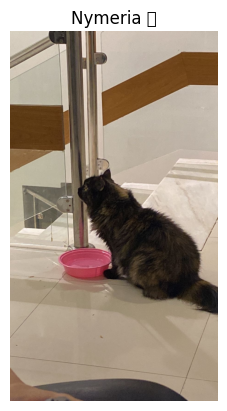

Prediction for Nymeria: non-cat (0.0289 confidence)


In [15]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


img_path = '../data/Nymeria.JPG'


image = Image.open(img_path)
plt.imshow(image)
plt.axis('off')
plt.title("Nymeria 🐾")
plt.show()

image = image.resize((64, 64))

img_array = np.array(image).reshape((1, -1)).T / 255.0

AL, _ = forward_propagation(img_array, parameters)
prediction = "cat" if AL > 0.5 else "non-cat"
print(f"Prediction for Nymeria: {prediction} ({AL[0][0]:.4f} confidence)")
